# Plots for 1-Gram, 2-Gram and 3-Grams based on various files
For all the plots, the same files were considered when considering n number of files. 
So, for the case of 2 files, the same two files were used for calculating the time for all the different combinations for plotting.

In [1]:
library(ggplot2)

In [2]:
single <- read.csv("time-1g.csv", header = T)
twoGram <- read.csv("time-2g.csv", header = T)
threeGram <- read.csv("time-3g.csv", header = T)

# Plotting for 1-Gram
For 1-Gram, I ran it on the VM with the default configuration and on a M4.Large AWS instance for comparing the runtimes on both the machines. The outputs were relatable I would say for upto 50 files, but for more than 50 files, the VM took significantly more time compared to the AWS Instance.

In [3]:
single_time <- c(single$m4.large,single$VM)
single_files <- c(single$Files, single$Files)

In [4]:
single_time_type <- c()
for(i in 1:length(single_time)){
    if (i<=11){
        single_time_type <- c(single_time_type, "M4.Large")
    }else{
        single_time_type <- c(single_time_type, "VM")
    }
        
}

In [5]:
single_plot <- data.frame(single_files,single_time_type,single_time)
names(single_plot) <- c("Files","ExecutionMachine","Time")

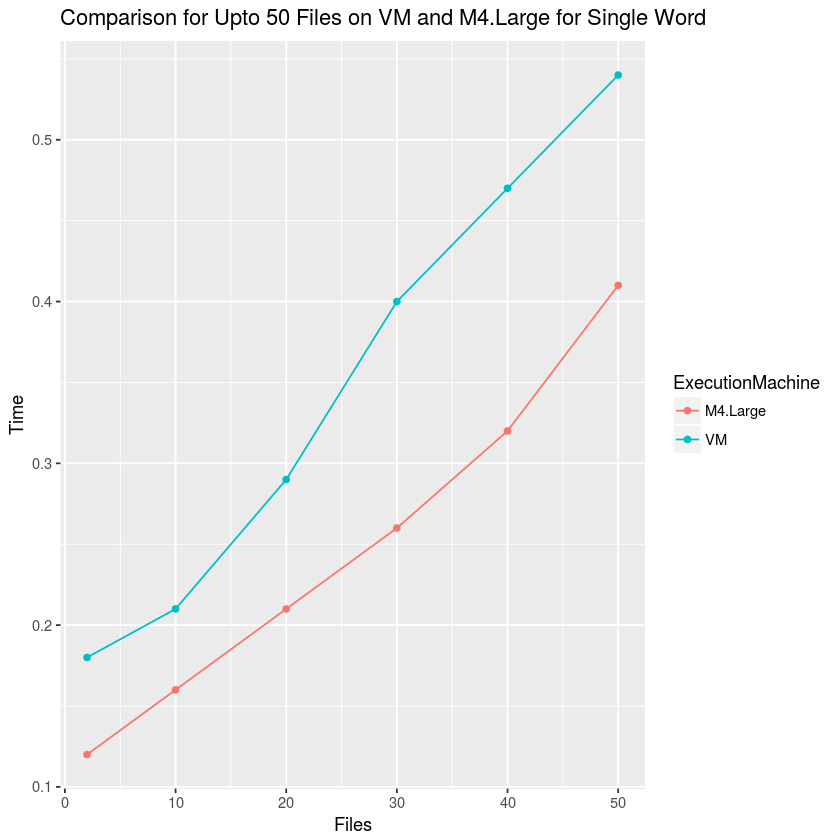

In [6]:
ggplot(data = single_plot[single_plot$Files<100,], aes(x=Files,y=Time, group =ExecutionMachine, color=ExecutionMachine)) +
                geom_line() + geom_point()  + ggtitle("Comparison for Upto 50 Files on VM and M4.Large for Single Word")

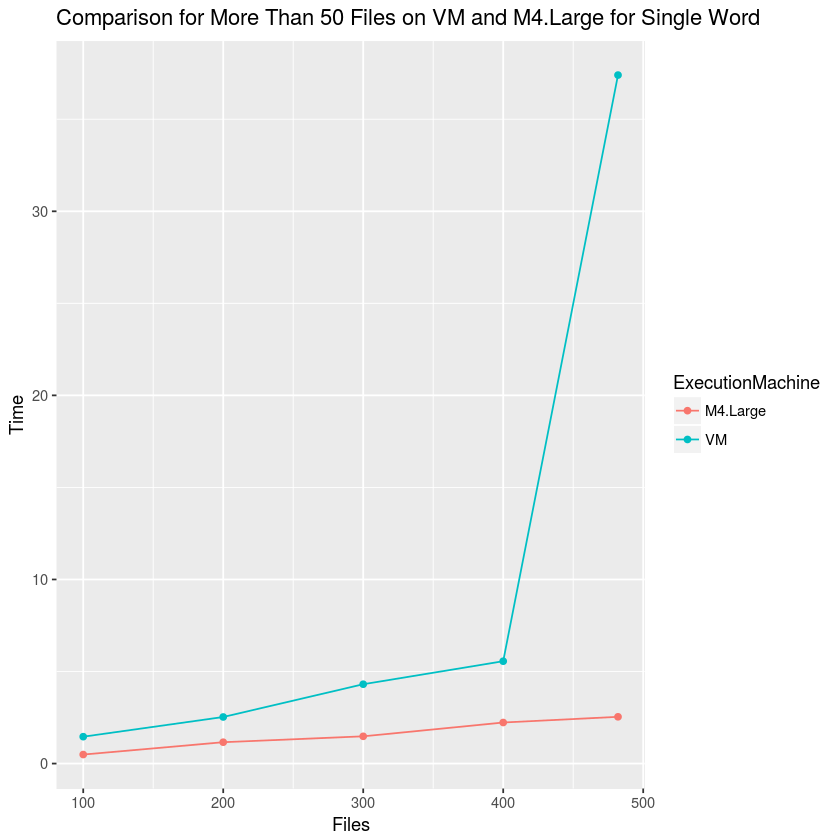

In [7]:
ggplot(data = single_plot[single_plot$Files>=100,], aes(x=Files,y=Time, group =ExecutionMachine, color=ExecutionMachine)) +
                        geom_line() + geom_point() + ggtitle("Comparison for More Than 50 Files on VM and M4.Large for Single Word")

# Plot for Single Word vs 2-Gram on M4.Large
The runtime for the 2-gram program on the VM was way too high for me to plot any results. Moreover, the hard drive space on the VM was very limited. So I decided to move to M4.Large for all my computation.
Even on M4.Large, I could only run for 50 files at the max without consuming too much time.

In [8]:
two_time <- c(single$m4.large,twoGram$m4.large)
two_files <- c(single$Files, twoGram$Files)
two_plot_type <- c()
for(i in 1:length(two_time)){
    if (i<=11){
        two_plot_type <- c(two_plot_type, "1-Gram")
    }else{
        two_plot_type <- c(two_plot_type, "2-Gram")
    }
        
}

In [9]:
two_plot <- data.frame(two_files,two_plot_type,two_time)
names(two_plot) <- c("Files","Type","Time")

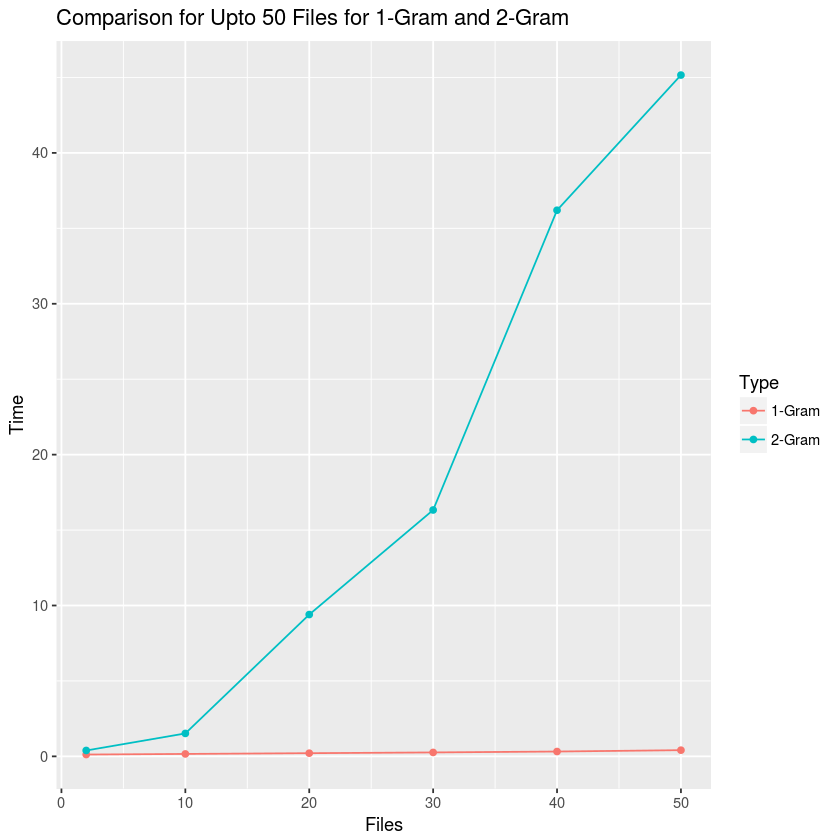

In [10]:
ggplot(data = two_plot[two_plot$Files<100,], aes(x=Files,y=Time, group =Type, color=Type)) + 
            geom_line() + geom_point() + ggtitle("Comparison for Upto 50 Files for 1-Gram and 2-Gram")

# Plot for Single Word vs 2-Gram vs 3-Gram on M4.Large
The runtime for the 3-gram program on the VM was way too high for even the 2 files that I considered in every other case. It took over an hour to finish even for that. Even before it could finish, it ran into memory outage and I realised that the program ended up using the entire 100GB of Hard Drive space on the AWS Instance. I then changed the drive to a 1TB Drive and executed for the 20 files, before realising that executing for more files is not possible in the given time frame.

In [11]:
all_time <- c(single$m4.large,twoGram$m4.large,threeGram$m4.large)
all_files <- c(single$Files, twoGram$Files,threeGram$Files)

In [12]:
all_plot_type <- c()
for(i in 1:length(all_time)){
    if (i<=11){
        all_plot_type <- c(all_plot_type, "1-Gram")
    }else if (i>11 && i<=17){
        all_plot_type <- c(all_plot_type, "2-Gram")
    }else{
        all_plot_type <- c(all_plot_type, "3-Gram")
    }
        
}

In [13]:
all_plot <- data.frame(all_files,all_plot_type,all_time)
names(all_plot) <- c("Files","Type","Time")

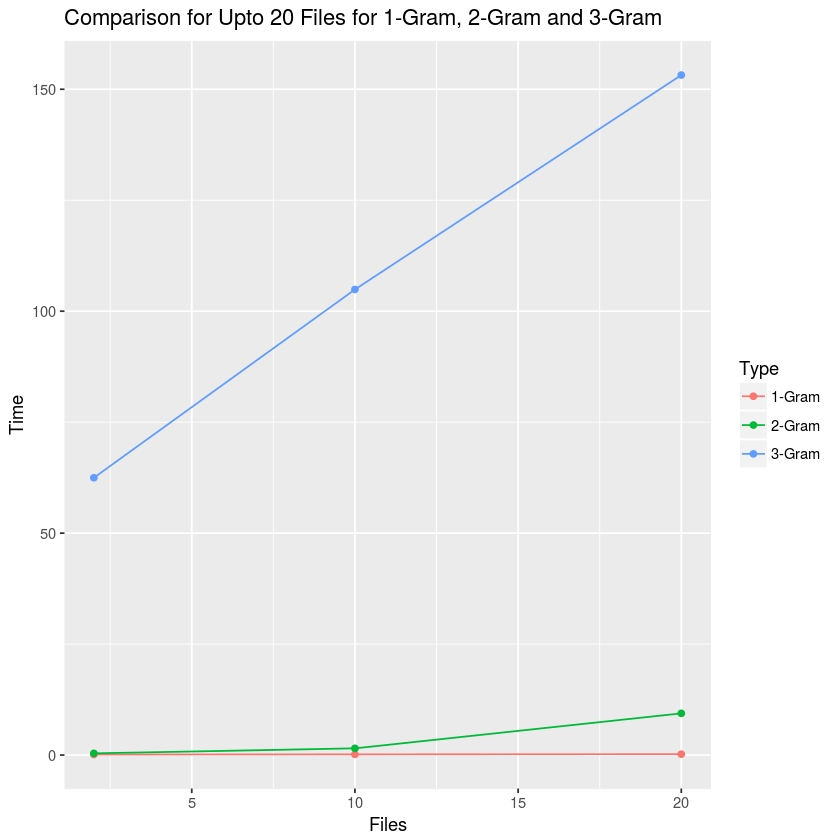

In [14]:
ggplot(data = all_plot[all_plot$Files<30,], aes(x=Files,y=Time, group =Type, color=Type)) + 
    geom_line() + geom_point() + ggtitle("Comparison for Upto 20 Files for 1-Gram, 2-Gram and 3-Gram")